# AgriYield Predictor – Introduction & Project Scope

**`Title:` AgriYield Predictor: Forecasting Crop Yield Using Environmental and Soil Data**


**`Objective:`**

To develop a machine learning system that predicts crop yield based on tabular environmental
and soil parameters such as rainfall, temperature, humidity, soil type, and nutrient content. The
project aims to assist farmers and agricultural planners in optimizing crop production.

**`Outcomes:`**

• Understand preprocessing and feature engineering on tabular agricultural datasets.

• Learn to train and evaluate regression models for yield prediction.

• Gain experience in model performance comparison and explainability (e.g., SHAP
values).

• Deliver a functional prototype with yield predictions based on user input or uploaded
data.

**`Dataset:`**

• FAO Crop Production Dataset: Contains crop yield data from different regions.




Link: https://www.fao.org/faostat/en/#data/QCL

• Kaggle or Indian Government Open Agriculture Data Portal: Includes environmental
and soil data by region.

Link1: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

Link2: https://www.data.gov.in/sector/agriculture

• Weather and Soil Data from publicly available sources like Kaggle, NOAA, or Open
Weather Map historical APIs.

Link: https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events

Link: https://www.ncei.noaa.gov/

**`Architectural diagram: `**


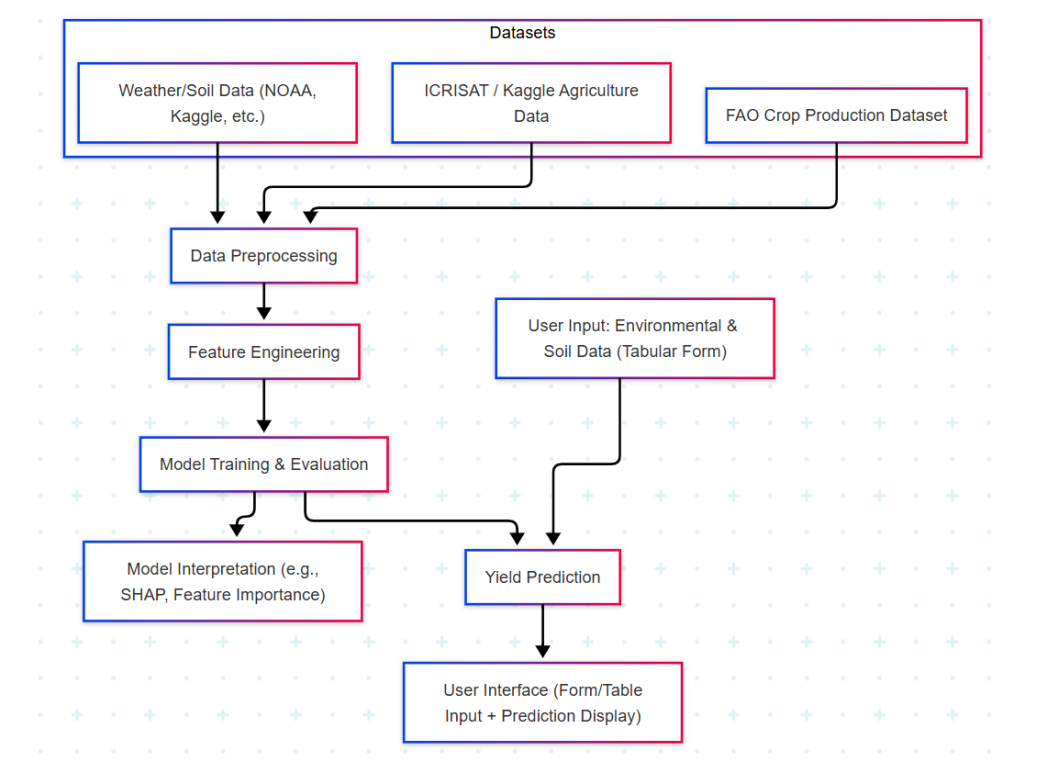



**`Modules to be Implemented:`**

1. Data Collection & Preprocessing
2. Exploratory Data Analysis (EDA) & Feature Engineering
3. Machine Learning Model Development
4. UI for Data Input and Prediction Output
5. Evaluation and Final Deployment

**`Tools & Tech Stack`**

To implement the AgriYield Predictor project effectively, consider the following tools and
technologies:



> Programming Language


• Python: Widely used for data analysis and machine learning tasks.

> Libraries & Frameworks

• Data Handling: pandas, numpy

• Visualization: matplotlib, seaborn, plotly

• Machine Learning: scikit-learn, xgboost, lightgbm

• Model Interpretation: SHAP, eli5

• Web Framework: Flask or Django for developing the web interface

• Frontend: HTML, CSS, JavaScript, possibly with Bootstrap for responsive design

> Development Tools

• IDE: Jupyter Notebook, VS Code

• Version Control: Git with platforms like GitHub or GitLab

• Deployment: Heroku, AWS, or Google Cloud Platform for hosting the application

# Machine Learning Pipeline – Step-by-Step Workflow

Step 1: Collection of Datasets

Collect datasets from FAO, Kaggle, NOAA, ICRISAT, etc.

---



Step 2: Exploratory Data Analysis (EDA)
* Combining Datasets
* Checking nulls




* Checking duplicates

* Checking outliers

* Checking distributions

* Checking bias




---


Step 3: Feature Engineering

* Extracting useful columns
* (Correlation matrix,...)
* Converting categorical → numerical

* Standardizing / Normalizing data

* (-1 to 1 or 0 to 1)... Standard Scaler / Min Max Scaler


---


Step 4: Splitting Dataset into Train & Test

`(x_train, x_test, y_train, y_test)`






---


Step 5: Selecting Suitable Model

Choose best ML algorithms (LR, DT, RF, XGBoost, etc.)


---


Step 6: Model Training(x_train, x_test)

Train the selected model using training data.


---


Step 7: Predicting Results

Generate predictions using test data:
`y_pred = model.predict(x_test)`


---


Step 8: Evaluating Model Accuracy(Y-pred,y_test)

Compare predictions vs actual:

* R² Score

* MAE

* RMSE


---


Step 9: Hyperparameter Tuning

Use GridSearchCV / RandomizedSearchCV to improve model.


---


Step 10: Retraining the Model with data(x_train,y_train)

Train model again using best parameters.


---


Step 11: Predicting Results (x_test)...y_pred

Run predictions again after tuning.


---


Step 12: Evaluating Model Accuracy (Y-pred,y_test)

Check improved metrics using tuned model.


---


Step 13: Deployment

Deploy the final model using Flask / Django / Streamlit and host it on cloud.

# Milestone 1: Week 1 & 2 - Requirements & Dataset Preparation

• Define project scope and success metrics.

• Collect and clean crop yield, weather, and soil datasets.

• Merge datasets based on geolocation and crop type.

• Handle missing values, normalize/standardize features.

In [226]:
import pandas as pd
fao = pd.read_csv("/content/FAOSTAT_data_en_12-8-2025.csv")
crop = pd.read_csv("/content/Crop_recommendation.csv")

## FAO Dataset Details

In [227]:
fao.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,484.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,t,166692.0,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,569271.0,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,kg/ha,430.3,A,Official figure,NaN


In [228]:
fao.shape

(5940, 15)

In [229]:
fao['Item'].unique()

array(['Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Areca nuts', 'Bananas', 'Barley',
       'Beans, dry', 'Cabbages', 'Cantaloupes and other melons',
       'Carrots and turnips', 'Cashew nuts, in shell', 'Cassava, fresh',
       'Castor oil seeds', 'Cauliflowers and broccoli', 'Cherries',
       'Chick peas, dry',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cocoa beans', 'Coconuts, in shell', 'Coffee, green', 'Coir, raw',
       'Cucumbers and gherkins', 'Eggplants (aubergines)', 'Figs',
       'Ginger, raw', 'Grapes', 'Green garlic',
       'Groundnuts, excluding shelled', 'Jute, raw or retted',
       'Kenaf, and other textile bast fibres, raw or retted',
       'Lemons and limes', 'Lentils, dry', 'Lettuce and chicory',
       'Linseed', 'Maize (corn)', 'Mangoes, guavas and mangosteens',
       'Millet', 'Mushrooms a

In [230]:
fao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5940 non-null   object 
 1   Domain            5940 non-null   object 
 2   Area Code (M49)   5940 non-null   int64  
 3   Area              5940 non-null   object 
 4   Element Code      5940 non-null   int64  
 5   Element           5940 non-null   object 
 6   Item Code (CPC)   5940 non-null   float64
 7   Item              5940 non-null   object 
 8   Year Code         5940 non-null   int64  
 9   Year              5940 non-null   int64  
 10  Unit              5940 non-null   object 
 11  Value             5727 non-null   float64
 12  Flag              5940 non-null   object 
 13  Flag Description  5940 non-null   object 
 14  Note              115 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 696.2+ KB


In [231]:
fao.isnull().sum()

,0
Domain Code,0
Domain,0
Area Code (M49),0
Area,0
Element Code,0
Element,0
Item Code (CPC),0
Item,0
Year Code,0
Year,0


## FAO Explode Operation


In [232]:
fao['Item'] = fao['Item'].str.split(',')
fao = fao.explode('Item')

In [233]:
#Explode Head
fao.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,Anise,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,badian,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,coriander,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,cumin,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,caraway,2000,2000,ha,344434.0,A,Official figure,NaN


In [234]:
print("Explode Shape:", fao.shape)

Explode Shape: (9160, 15)


In [235]:
fao['Element'].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [236]:
fao['Item'].unique()

array(['Anise', ' badian', ' coriander', ' cumin', ' caraway',
       ' fennel and juniper berries', ' raw', 'Apples', 'Apricots',
       'Areca nuts', 'Bananas', 'Barley', 'Beans', ' dry', 'Cabbages',
       'Cantaloupes and other melons', 'Carrots and turnips',
       'Cashew nuts', ' in shell', 'Cassava', ' fresh',
       'Castor oil seeds', 'Cauliflowers and broccoli', 'Cherries',
       'Chick peas', 'Chillies and peppers', ' dry (Capsicum spp.',
       ' Pimenta spp.)', ' green (Capsicum spp. and Pimenta spp.)',
       'Cocoa beans', 'Coconuts', 'Coffee', ' green', 'Coir',
       'Cucumbers and gherkins', 'Eggplants (aubergines)', 'Figs',
       'Ginger', 'Grapes', 'Green garlic', 'Groundnuts',
       ' excluding shelled', 'Jute', ' raw or retted', 'Kenaf',
       ' and other textile bast fibres', 'Lemons and limes', 'Lentils',
       'Lettuce and chicory', 'Linseed', 'Maize (corn)', 'Mangoes',
       ' guavas and mangosteens', 'Millet', 'Mushrooms and truffles',
       'Natural 

In [237]:
fao_production = fao[fao['Element'] == 'Production']

print("FAO Production Data:")
fao_production.head()

FAO Production Data:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,Anise,2000,2000,t,166692.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,badian,2000,2000,t,166692.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,coriander,2000,2000,t,166692.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,cumin,2000,2000,t,166692.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,caraway,2000,2000,t,166692.0,A,Official figure,NaN


In [238]:
print("Shape:", fao_production.shape)

Shape: (3144, 15)


In [239]:
fao_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3144 entries, 2 to 5939
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3144 non-null   object 
 1   Domain            3144 non-null   object 
 2   Area Code (M49)   3144 non-null   int64  
 3   Area              3144 non-null   object 
 4   Element Code      3144 non-null   int64  
 5   Element           3144 non-null   object 
 6   Item Code (CPC)   3144 non-null   float64
 7   Item              3144 non-null   object 
 8   Year Code         3144 non-null   int64  
 9   Year              3144 non-null   int64  
 10  Unit              3144 non-null   object 
 11  Value             2986 non-null   float64
 12  Flag              3144 non-null   object 
 13  Flag Description  3144 non-null   object 
 14  Note              143 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 393.0+ KB


In [240]:
fao_production['Item'].unique()

array(['Anise', ' badian', ' coriander', ' cumin', ' caraway',
       ' fennel and juniper berries', ' raw', 'Apples', 'Apricots',
       'Areca nuts', 'Bananas', 'Barley', 'Beans', ' dry', 'Cabbages',
       'Cantaloupes and other melons', 'Carrots and turnips',
       'Cashew nuts', ' in shell', 'Cassava', ' fresh',
       'Castor oil seeds', 'Cauliflowers and broccoli', 'Cherries',
       'Chick peas', 'Chillies and peppers', ' dry (Capsicum spp.',
       ' Pimenta spp.)', ' green (Capsicum spp. and Pimenta spp.)',
       'Cocoa beans', 'Coconuts', 'Coffee', ' green', 'Coir',
       'Cucumbers and gherkins', 'Eggplants (aubergines)', 'Figs',
       'Ginger', 'Grapes', 'Green garlic', 'Groundnuts',
       ' excluding shelled', 'Jute', ' raw or retted', 'Kenaf',
       ' and other textile bast fibres', 'Lemons and limes', 'Lentils',
       'Lettuce and chicory', 'Linseed', 'Maize (corn)', 'Mangoes',
       ' guavas and mangosteens', 'Millet', 'Mushrooms and truffles',
       'Natural 

In [241]:
fao_production['Item'] = fao_production['Item'].str.lower().str.strip()

/tmp/ipython-input-259674701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fao_production['Item'] = fao_production['Item'].str.lower().str.strip()


## Crop Dataset Details


In [242]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [243]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [244]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [245]:
crop.shape

(2200, 8)

In [246]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [247]:
crop['label'] = crop['label'].str.lower().str.strip()

## Merge Both Datasets

In [248]:
fao_production.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,anise,2000,2000,t,166692.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,badian,2000,2000,t,166692.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,coriander,2000,2000,t,166692.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,cumin,2000,2000,t,166692.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,caraway,2000,2000,t,166692.0,A,Official figure,NaN


In [249]:
fao_production['Element'].unique()

array(['Production'], dtype=object)

In [250]:
fao_production['Item'].unique()

array(['anise', 'badian', 'coriander', 'cumin', 'caraway',
       'fennel and juniper berries', 'raw', 'apples', 'apricots',
       'areca nuts', 'bananas', 'barley', 'beans', 'dry', 'cabbages',
       'cantaloupes and other melons', 'carrots and turnips',
       'cashew nuts', 'in shell', 'cassava', 'fresh', 'castor oil seeds',
       'cauliflowers and broccoli', 'cherries', 'chick peas',
       'chillies and peppers', 'dry (capsicum spp.', 'pimenta spp.)',
       'green (capsicum spp. and pimenta spp.)', 'cocoa beans',
       'coconuts', 'coffee', 'green', 'coir', 'cucumbers and gherkins',
       'eggplants (aubergines)', 'figs', 'ginger', 'grapes',
       'green garlic', 'groundnuts', 'excluding shelled', 'jute',
       'raw or retted', 'kenaf', 'and other textile bast fibres',
       'lemons and limes', 'lentils', 'lettuce and chicory', 'linseed',
       'maize (corn)', 'mangoes', 'guavas and mangosteens', 'millet',
       'mushrooms and truffles', 'natural rubber in primary forms'

In [251]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [252]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [253]:
merged = pd.merge(
    fao_production,
    crop,
    left_on='Item',
    right_on='label',
    how='inner'
)

print("Merged Shape:", merged.shape)

Merged Shape: (9600, 23)


In [254]:
merged.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,Flag Description,Note,N,P,K,temperature,humidity,ph,rainfall,label
0,QCL,Crops and livestock products,356,India,5510,Production,1610.0,coffee,2000,2000,...,Official figure,NaN,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,QCL,Crops and livestock products,356,India,5510,Production,1610.0,coffee,2000,2000,...,Official figure,NaN,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,QCL,Crops and livestock products,356,India,5510,Production,1610.0,coffee,2000,2000,...,Official figure,NaN,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,QCL,Crops and livestock products,356,India,5510,Production,1610.0,coffee,2000,2000,...,Official figure,NaN,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,QCL,Crops and livestock products,356,India,5510,Production,1610.0,coffee,2000,2000,...,Official figure,NaN,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


In [255]:
merged['label'].unique()

array(['coffee', 'grapes', 'jute', 'rice'], dtype=object)

In [256]:
merged['Item'].unique()

array(['coffee', 'grapes', 'jute', 'rice'], dtype=object)

In [257]:
merged['Element'].unique()

array(['Production'], dtype=object)

In [258]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       9600 non-null   object 
 1   Domain            9600 non-null   object 
 2   Area Code (M49)   9600 non-null   int64  
 3   Area              9600 non-null   object 
 4   Element Code      9600 non-null   int64  
 5   Element           9600 non-null   object 
 6   Item Code (CPC)   9600 non-null   float64
 7   Item              9600 non-null   object 
 8   Year Code         9600 non-null   int64  
 9   Year              9600 non-null   int64  
 10  Unit              9600 non-null   object 
 11  Value             9600 non-null   float64
 12  Flag              9600 non-null   object 
 13  Flag Description  9600 non-null   object 
 14  Note              0 non-null      object 
 15  N                 9600 non-null   int64  
 16  P                 9600 non-null   int64  


In [259]:
merged.isnull().sum()

,0
Domain Code,0
Domain,0
Area Code (M49),0
Area,0
Element Code,0
Element,0
Item Code (CPC),0
Item,0
Year Code,0
Year,0


## Drop irrelevant Column Data

In [260]:
columns_to_drop = [
    'Domain Code', 'Domain', 'Area Code (M49)', 'Area',
    'Element Code','Item Code (CPC)','item',
    'Year Code', 'Year', 'Unit', 'Flag',
    'Flag Description', 'Note'
]

In [261]:
merged.drop(columns=[c for c in columns_to_drop if c in merged.columns],inplace=True)

In [262]:
merged

,Element,Item,Value,N,P,K,temperature,humidity,ph,rainfall,label
0,Production,coffee,292000.0,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,Production,coffee,292000.0,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,Production,coffee,292000.0,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,Production,coffee,292000.0,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,Production,coffee,292000.0,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee
...,...,...,...,...,...,...,...,...,...,...,...
9595,Production,rice,206727000.0,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
9596,Production,rice,206727000.0,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
9597,Production,rice,206727000.0,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
9598,Production,rice,206727000.0,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [263]:
final_data = merged[['Element', 'Value', 'N', 'P', 'K',
                      'temperature', 'humidity', 'ph', 'rainfall', 'label']]

print("Final dataset ready!")

Final dataset ready!


In [264]:
final_data.head()

,Element,Value,N,P,K,temperature,humidity,ph,rainfall,label
0,Production,292000.0,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,Production,292000.0,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,Production,292000.0,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,Production,292000.0,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,Production,292000.0,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


In [265]:
final_data.shape

(9600, 10)

In [266]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Element      9600 non-null   object 
 1   Value        9600 non-null   float64
 2   N            9600 non-null   int64  
 3   P            9600 non-null   int64  
 4   K            9600 non-null   int64  
 5   temperature  9600 non-null   float64
 6   humidity     9600 non-null   float64
 7   ph           9600 non-null   float64
 8   rainfall     9600 non-null   float64
 9   label        9600 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 750.1+ KB


## EDA (Exploratory Data Analysis) Perform On Final_Data

In [267]:
print(final_data.describe())

              Value            N           P            K  temperature  \
count  9.600000e+03  9600.000000  9600.00000  9600.000000  9600.000000   
mean   4.012885e+07    70.667500    63.92750    77.477500    24.509440   
std    6.817683e+07    31.213033    41.00826    70.994257     5.098699   
min    2.620000e+05     0.000000    15.00000    25.000000     8.825675   
25%    7.475250e+05    55.000000    37.00000    35.000000    23.176366   
50%    1.842500e+06    79.000000    47.00000    40.000000    24.846438   
75%    2.973758e+07    92.000000    75.00000    82.500000    26.392599   
max    2.067270e+08   120.000000   145.00000   205.000000    41.948657   

          humidity           ph     rainfall  
count  9600.000000  9600.000000  9600.000000  
mean     75.664440     6.493623   159.663009  
std      10.574704     0.593988    63.735591  
min      50.045570     5.005307    65.010953  
25%      70.648966     6.085485   105.096066  
50%      80.719235     6.428868   168.977582  
75% 

In [268]:
print("\nMissing Values Before Handling:")
print(final_data.isnull().sum())


Missing Values Before Handling:
Element        0
Value          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [269]:
final_data = final_data.dropna()
print("\nMissing Values After Handling:")
print(final_data.isnull().sum())


Missing Values After Handling:
Element        0
Value          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [270]:
print("\nDuplicate rows before drop:", final_data.duplicated().sum())
final_data = final_data.drop_duplicates()
print("Duplicate rows after drop:", final_data.duplicated().sum())


Duplicate rows before drop: 100
Duplicate rows after drop: 0


In [271]:
final_data['Element'].unique()

array(['Production'], dtype=object)

In [272]:
final_data['label'].unique()

array(['coffee', 'grapes', 'jute', 'rice'], dtype=object)

## BOXPLOTS FOR OUTLIERS (Final_Data)

### 1. Boxplots BEFORE Outlier Removal

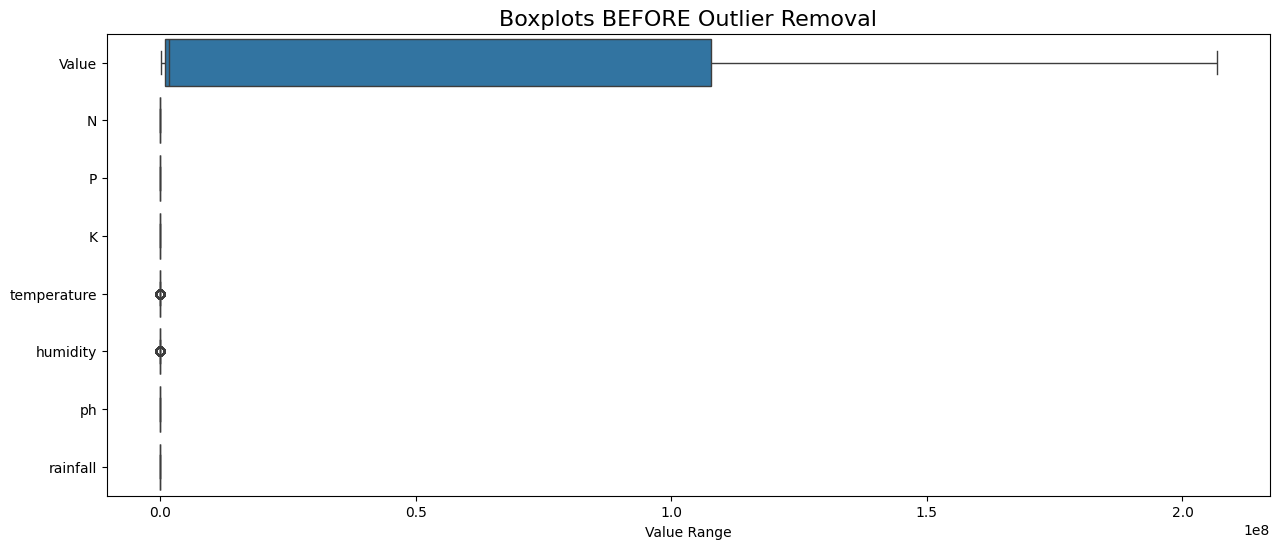

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(15, 6))
sns.boxplot(data=final_data[numeric_cols], orient='h')
plt.title("Boxplots BEFORE Outlier Removal", fontsize=16)
plt.xlabel("Value Range")
plt.show()

### 2. Remove Outliers Using IQR Method

In [274]:
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

cleaned_data = remove_outliers_iqr(final_data, numeric_cols)
print("Shape Before:", final_data.shape)
print("Shape After Outlier Removal:", cleaned_data.shape)


Shape Before: (9500, 10)
Shape After Outlier Removal: (6644, 10)


### 3. Boxplots AFTER Outlier Removal

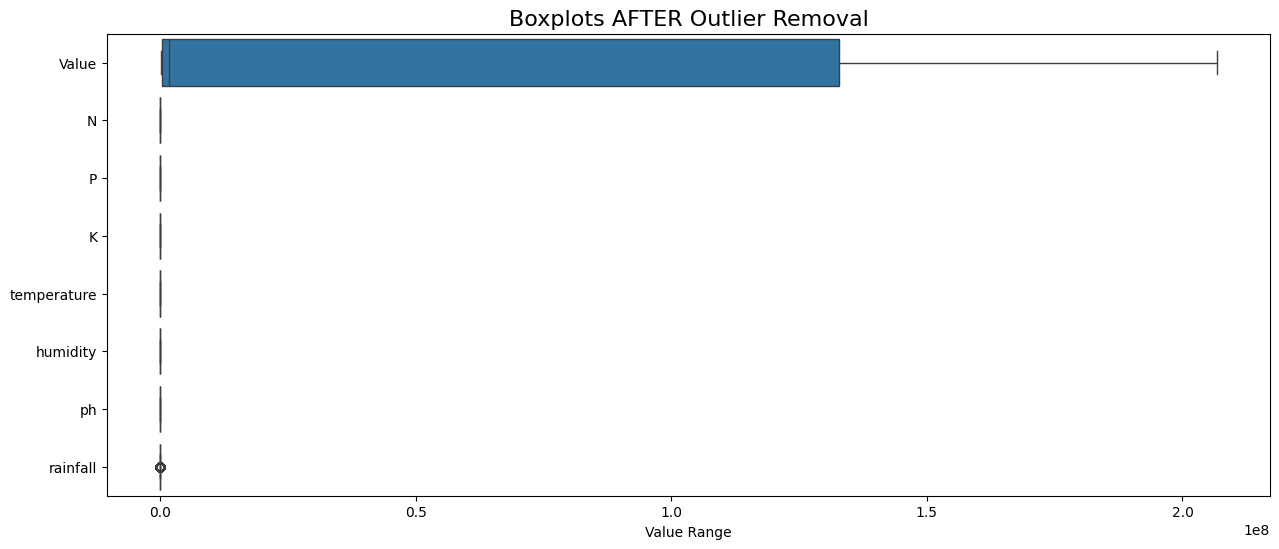

In [275]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cleaned_data[numeric_cols], orient='h')
plt.title("Boxplots AFTER Outlier Removal", fontsize=16)
plt.xlabel("Value Range")
plt.show()

### 4. Correlation Heatmap

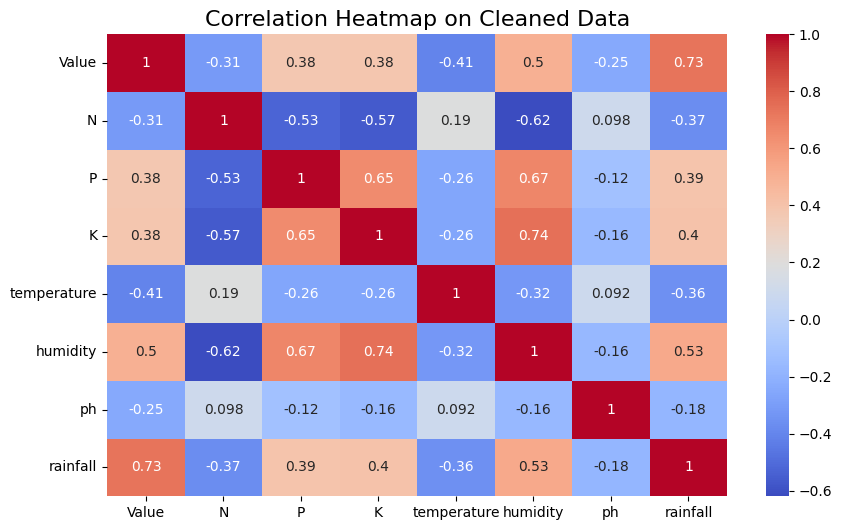

In [276]:
plt.figure(figsize=(10,6))
sns.heatmap(cleaned_data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap on Cleaned Data", fontsize=16)
plt.show()

### 5. Pairplot (Limit to 400 rows for speed)

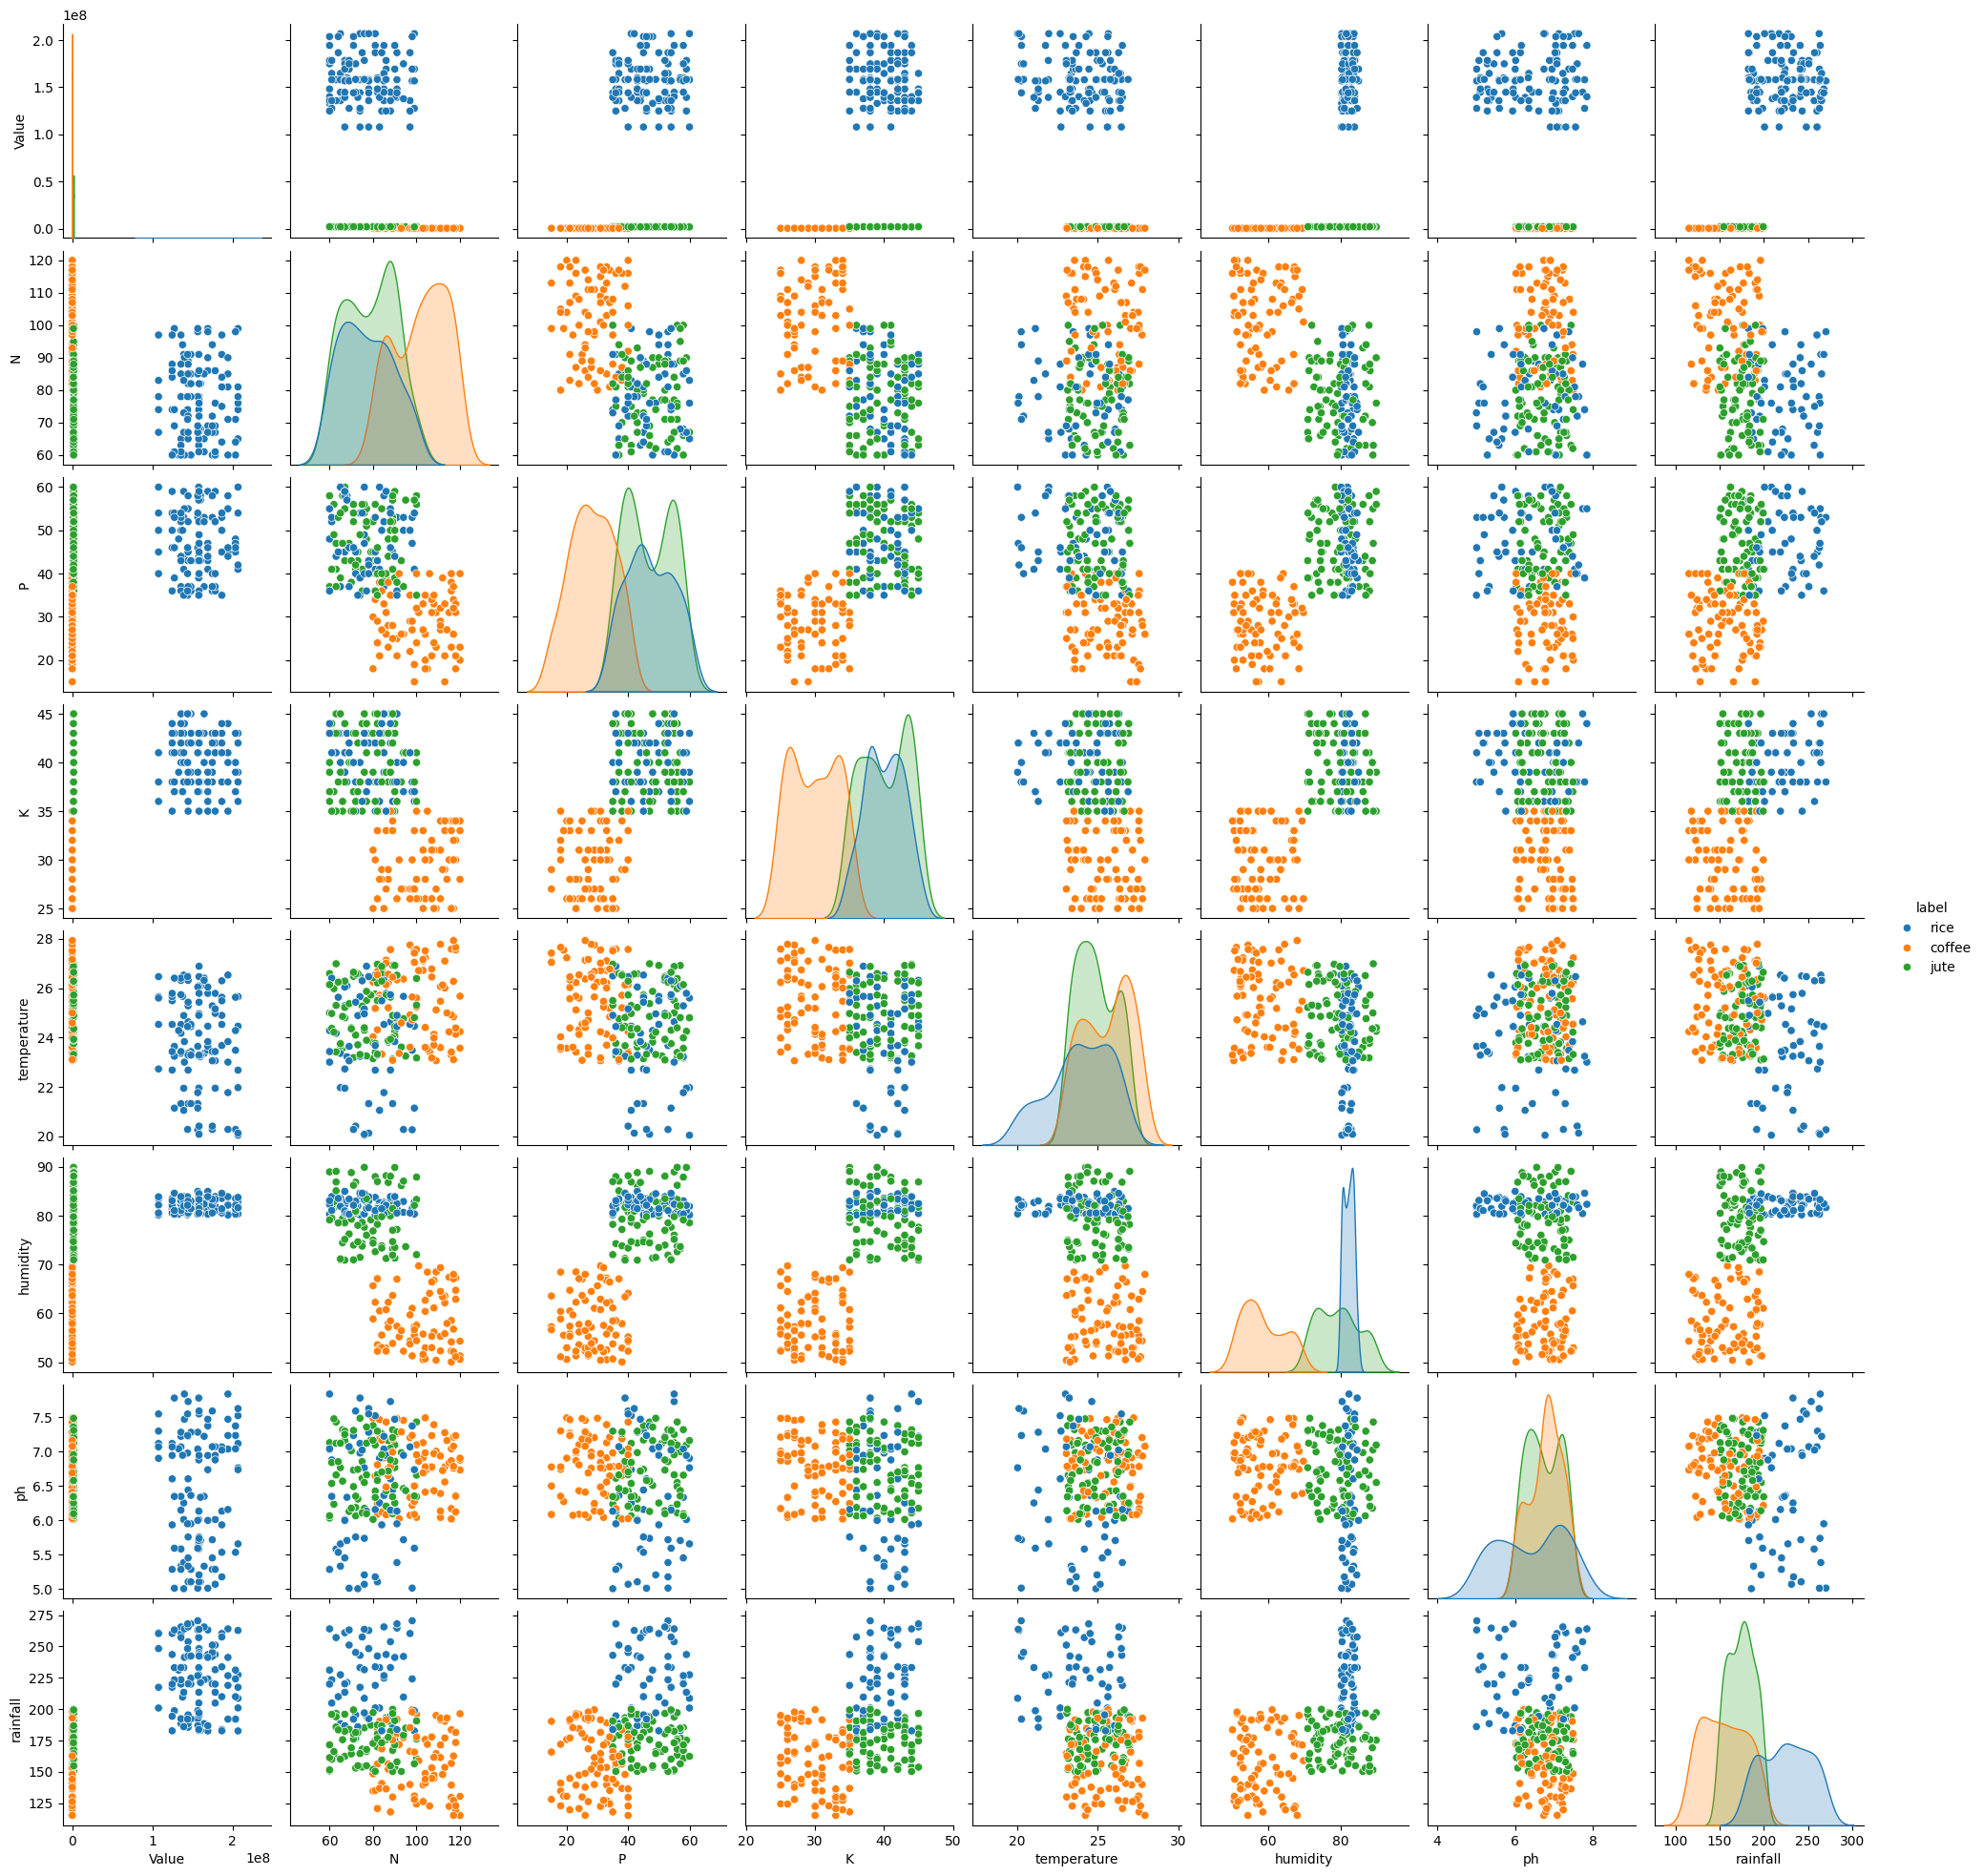

In [277]:
sample_data = cleaned_data.sample(n=400, random_state=42)

sns.pairplot(sample_data[numeric_cols + ['label']], hue='label')
plt.show()


### 6. Export Final Cleaned CSV

In [278]:
cleaned_data.to_csv("final_cleaned_dataset.csv", index=False)
print("Cleaned CSV Saved Successfully!")

Cleaned CSV Saved Successfully!


In [279]:
cleaned_data.head()

,Element,Value,N,P,K,temperature,humidity,ph,rainfall,label
0,Production,292000.0,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,Production,292000.0,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,Production,292000.0,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,Production,292000.0,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,Production,292000.0,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


In [280]:
cleaned_data['label'].unique()

array(['coffee', 'jute', 'rice'], dtype=object)

In [281]:
cleaned_data.shape

(6644, 10)

# Milestone 2: Week 3 & 4 - EDA & Feature Engineering

• Visualize relationships between features and yield.

• Identify important variables (e.g., NPK levels, rainfall).

• Encode categorical features (e.g., soil type, crop name).

• Engineer new features like growing season index, heat days, etc.